# Informe de Análisis del Dataset de Libros - Yerlin Duarte 22-0428 


## Introducción
En este informe, se detalla el análisis y la limpieza del conjunto de datos `BooksDataset.csv`, utilizando las librerías de Python `pandas`, `matplotlib`, y `seaborn`. El objetivo es examinar la estructura general del dataset, realizar algunas transformaciones y visualizar las distribuciones de ciertos atributos clave, como el año de publicación y la editorial.

## 1. Importación de Librerías
Para llevar a cabo este análisis, hemos utilizado las siguientes librerías:
- **pandas**: Para la manipulación de datos.
- **matplotlib** y **seaborn**: Para la creación de gráficos.


## 2. Carga del Dataset
El dataset fue cargado desde un archivo CSV llamado `BooksDataset.csv` utilizando `pandas`.
Esto permitió acceder a toda la información contenida en el conjunto de datos.


In [7]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


df = pd.read_csv('BooksDataset.csv') 
df.head()

,Title,Authors,Description,Category,Publisher,Publish Date,Price
0,Goat Brothers,"By Colton, Larry",NaN,"History , General",Doubleday,"Friday, January 1, 1993",Price Starting at $8.79
1,The Missing Person,"By Grumbach, Doris",NaN,"Fiction , General",Putnam Pub Group,"Sunday, March 1, 1981",Price Starting at $4.99
2,Don't Eat Your Heart Out Cookbook,"By Piscatella, Joseph C.",NaN,"Cooking , Reference",Workman Pub Co,"Thursday, September 1, 1983",Price Starting at $4.99
3,When Your Corporate Umbrella Begins to Leak: A...,"By Davis, Paul D.",NaN,NaN,Natl Pr Books,"Monday, April 1, 1991",Price Starting at $4.99
4,Amy Spangler's Breastfeeding : A Parent's Guide,"By Spangler, Amy",NaN,NaN,Amy Spangler,"Saturday, February 1, 1997",Price Starting at $5.32


## 3. Exploración Inicial del Dataset
### Información General
Con el comando `df.info()`, obtuvimos información sobre las columnas del dataset, el tipo de datos y la cantidad de valores nulos presentes en cada columna. Este paso es crucial para entender la estructura y la calidad de los datos.

### Descripción Estadística
A continuación, se utilizó `df.describe()` para generar una descripción estadística de las columnas numéricas. Esto incluyó métricas como el promedio, la desviación estándar, el valor mínimo y los percentiles de cada columna numérica del dataset.

In [12]:

df.info()

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103082 entries, 0 to 103081
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Title         103082 non-null  object
 1   Authors       103082 non-null  object
 2   Description   70213 non-null   object
 3   Category      76912 non-null   object
 4   Publisher     103074 non-null  object
 5   Publish Date  103082 non-null  object
 6   Price         103082 non-null  object
dtypes: object(7)
memory usage: 5.5+ MB


,Title,Authors,Description,Category,Publisher,Publish Date,Price
count,103082,103082,70213,76912,103074,103082,103082
unique,97818,63580,68831,3106,13029,956,1387
top,The Nutcracker,By,For Ingest Only - Data needs to be cleaned up ...,"Fiction , General",Simon & Schuster,"Thursday, January 1, 2004",Price Starting at $5.29
freq,12,1043,30,2549,1521,868,41876


## 4. Limpieza de Datos
Se eliminaron las filas que contenían valores faltantes, en particular en las columnas de `Publish Date (Year)` y `Price`. El dataset limpio fue almacenado en una nueva variable `BooksDatasetClean`.

Además, se renombró la columna `Price` a `Price Starting With ($)` para mantener consistencia en la nomenclatura de las columnas.

In [13]:

df.isnull().sum()


df_clean = df.dropna()


df_clean.isnull().sum()


Title           0
Authors         0
Description     0
Category        0
Publisher       0
Publish Date    0
Price           0
dtype: int64

## 5. Transformaciones de Datos
Se realizaron algunas transformaciones adicionales en la columna `Publish Date` para extraer tanto el mes como el año en el que se publicaron los libros. 

In [14]:
# Cargar el dataset original
df = pd.read_csv('BooksDataset.csv')

# Convertir 'Publish Date' en dos columnas: 'Publish Date (Month)' y 'Publish Date (Year)'
df['Publish Date'] = pd.to_datetime(df['Publish Date'], errors='coerce')  # Convertir a formato de fecha
df['Publish Date (Month)'] = df['Publish Date'].dt.month  # Extraer el mes
df['Publish Date (Year)'] = df['Publish Date'].dt.year  # Extraer el año

# Eliminar las filas con valores nulos en 'Publish Date (Year)' o en 'Price'
BooksDatasetClean = df.dropna(subset=['Publish Date (Year)', 'Price'])

# Renombrar la columna 'Price' a 'Price Starting With ($)' para mantener consistencia con el nuevo dataset
BooksDatasetClean = BooksDatasetClean.rename(columns={'Price': 'Price Starting With ($)'})

# Verifica que BooksDatasetClean ha sido correctamente creado
BooksDatasetClean.head()


,Title,Authors,Description,Category,Publisher,Publish Date,Price Starting With ($),Publish Date (Month),Publish Date (Year)
0,Goat Brothers,"By Colton, Larry",NaN,"History , General",Doubleday,1993-01-01,Price Starting at $8.79,1.0,1993.0
1,The Missing Person,"By Grumbach, Doris",NaN,"Fiction , General",Putnam Pub Group,1981-03-01,Price Starting at $4.99,3.0,1981.0
2,Don't Eat Your Heart Out Cookbook,"By Piscatella, Joseph C.",NaN,"Cooking , Reference",Workman Pub Co,1983-09-01,Price Starting at $4.99,9.0,1983.0
3,When Your Corporate Umbrella Begins to Leak: A...,"By Davis, Paul D.",NaN,NaN,Natl Pr Books,1991-04-01,Price Starting at $4.99,4.0,1991.0
4,Amy Spangler's Breastfeeding : A Parent's Guide,"By Spangler, Amy",NaN,NaN,Amy Spangler,1997-02-01,Price Starting at $5.32,2.0,1997.0


## 6. Visualización de Datos
### Distribución de Libros por Año de Publicación
Para analizar la cantidad de libros publicados por año, se generó un histograma que muestra la distribución de los libros en función del año de publicación. Este gráfico nos muestra una visión clara de los años con mayor actividad editorial y nos permite identificar tendencias en el tiempo.


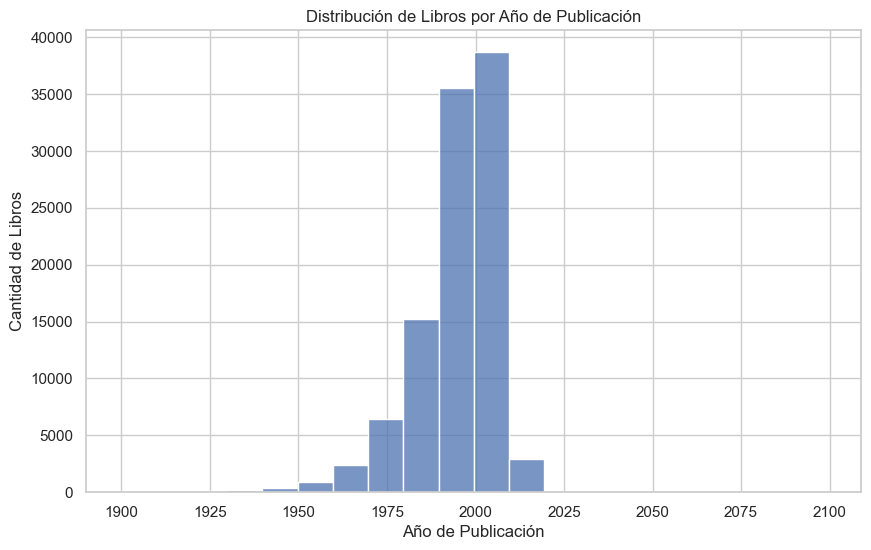

In [16]:
# Distribución de libros por año de publicación
plt.figure(figsize=(10, 6))
sns.histplot(BooksDatasetClean['Publish Date (Year)'], bins=20)
plt.title('Distribución de Libros por Año de Publicación')
plt.xlabel('Año de Publicación')
plt.ylabel('Cantidad de Libros')
plt.show()


### Distribución de Libros por Editorial
Finalmente, se muestra un gráfico circular que destaca las 10 editoriales con mayor cantidad de libros en el dataset. Este gráfico nos permite visualizar la proporción de libros publicados por cada una de las principales editoriales.

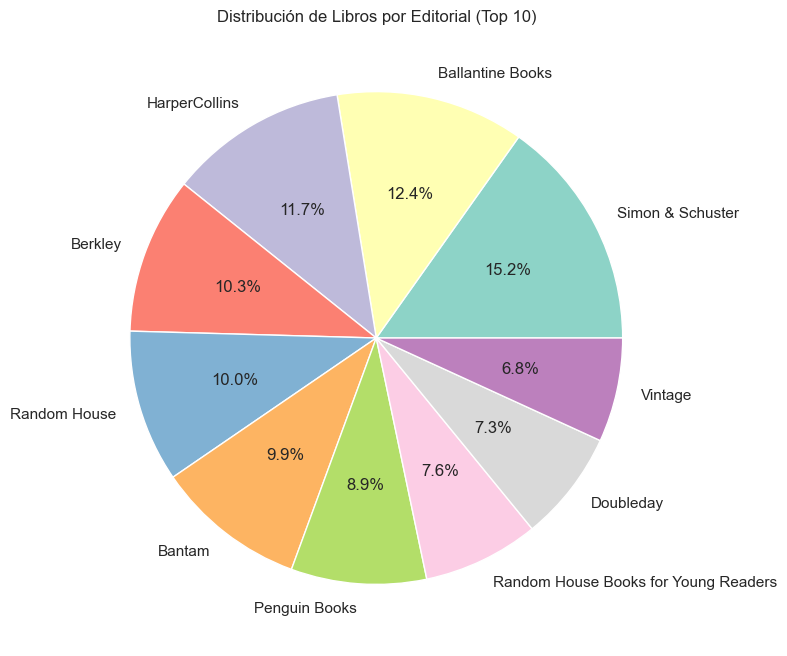

In [21]:
# Distribución de libros por editorial (gráfico circular)
publishers_dist = BooksDatasetClean['Publisher'].value_counts().nlargest(10)
plt.figure(figsize=(8, 8))
publishers_dist.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set3', len(publishers_dist)))
plt.title('Distribución de Libros por Editorial (Top 10)')
plt.ylabel('')
plt.show()



## 7. Conclusiones
A partir de este análisis realizado, podemos concluir que:
- El conjunto de datos `BooksDataset.csv` contenía información valiosa sobre los libros, incluyendo su fecha de publicación y precio.
- Se realizaron transformaciones en los datos para estructurar mejor la información temporal.
- Se eliminó información faltante para garantizar un análisis más preciso.
- Las visualizaciones revelaron patrones interesantes en cuanto a los años de mayor actividad editorial y la concentración de libros en ciertas editoriales.
